# ISLR Chapter 6 - End of Chapter Applied exercises code portion solutions¶

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions by Arthur Avila

### 8. In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

#### (a) Use the `rnorm()` function to generate a predictor $X$ of length $n = 100$, as well as a noise vector $\varepsilon$ of length $n = 100$.

#### (b) Generate a response vector $Y$ of length $n = 100$ according to the model
$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \varepsilon,
$$
#### where $\beta_0$ , $\beta_1$ , $\beta_2$ , and $\beta_3$ are constants of your choice.

#### (c) Use the `regsubsets()` function to perform best subset selection in order to choose the best model containing the predictors $X, X^2 , \dots , X^{10}$. What is the best model obtained according to $C_p$ , BIC, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the $data.frame()$ function to create a single data set containing both $X$ and $Y$.

#### (d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

#### (e) Now fit a lasso model to the simulated data, again using $X, X^2 ,\dots , X^{10}$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.

#### (f) Now generate a response vector $Y$ according to the model 
$$
Y = \beta_0 + \beta_7 X^7 + \varepsilon,
$$
#### and perform best subset selection and the lasso. Discuss the results obtained.

Loading required package: leaps
Loading required package: repr


$Cp
 (Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 
    2.693015    16.096475     9.833955    37.927076 

$bic
 (Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 
    2.693015    16.096475     9.833955    37.927076 

$adjr2
 (Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 poly(x, 10)5 
   2.6930148   16.0964746    9.8339548   37.9270758    0.9247187

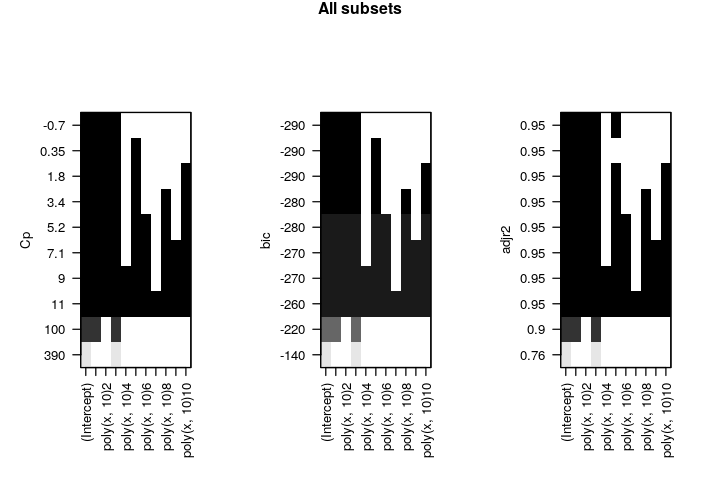

In [1]:
require(leaps)
require(repr)

# a
set.seed(321)
x = rnorm(100)

# b
y = 2 - 4*x + x^2 + 2*x^3 + rnorm(100)

# c
df = data.frame(y,x)
regsub.all = regsubsets(y~poly(x,10),df,nvmax=10)
# plotting c

mysummary <- function(criteria, subsetmodel){
    plot(subsetmodel, scale=criteria)
    id <- ifelse(criteria=='adjr2',
                 which.max(summary(subsetmodel)[[tolower(criteria)]]),
                 which.min(summary(subsetmodel)[[tolower(criteria)]]))
    return(coef(subsetmodel, id=id))
}

options(repr.plot.width=6, repr.plot.height=4)
par(mfrow=c(1,3), oma=c(0,0,1,0))
criteria = c('Cp','bic','adjr2')
sapply(criteria,mysummary,regsub.all)
#sapply(criteria,function(x) plot(regsub.all, scale=x))
title("All subsets", outer=T)

$Cp
 (Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 
    2.693015    16.096475     9.833955    37.927076 

$bic
 (Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 
    2.693015    16.096475     9.833955    37.927076 

$adjr2
 (Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 poly(x, 10)5 
   2.6930148   16.0964746    9.8339548   37.9270758    0.9247187

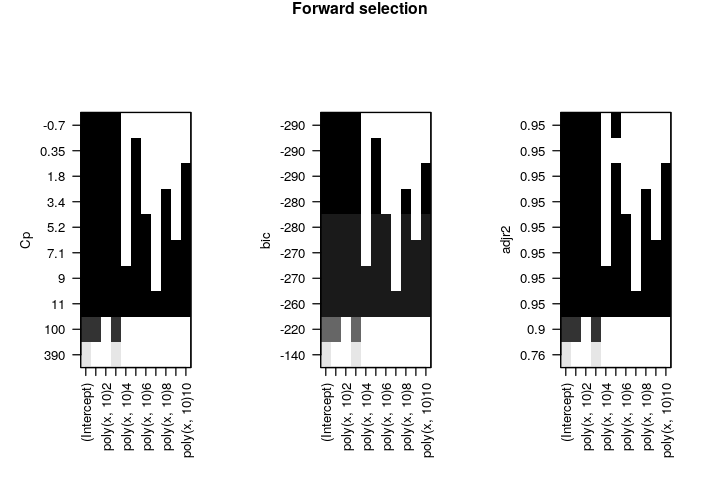

$Cp
 (Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 
    2.693015    16.096475     9.833955    37.927076 

$bic
 (Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 
    2.693015    16.096475     9.833955    37.927076 

$adjr2
 (Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 poly(x, 10)5 
   2.6930148   16.0964746    9.8339548   37.9270758    0.9247187

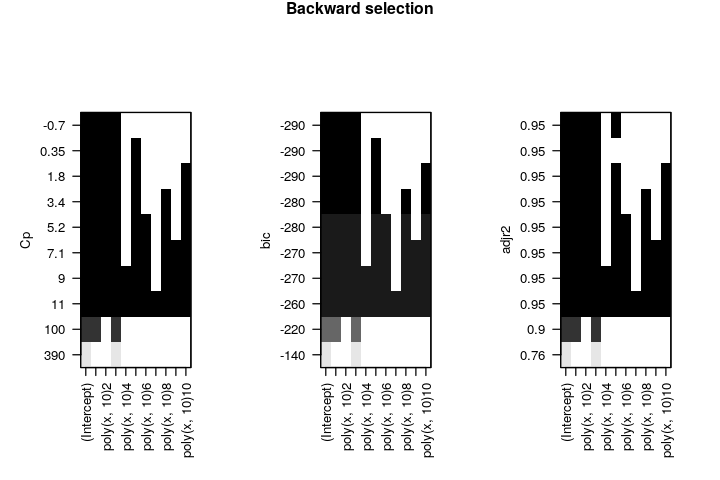

In [2]:
# d 
regsub.fwd = regsubsets(y~poly(x,10),df,nvmax=10, method="forward")
regsub.bwd = regsubsets(y~poly(x,10),df,nvmax=10, method="backward")
# plotting d
options(repr.plot.width=6, repr.plot.height=4)
par(mfrow=c(1,3), oma=c(0,0,1,0))
sapply(criteria,mysummary,regsub.fwd)
title("Forward selection", outer=T)       
sapply(criteria,mysummary,regsub.bwd)
title("Backward selection", outer=T)

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

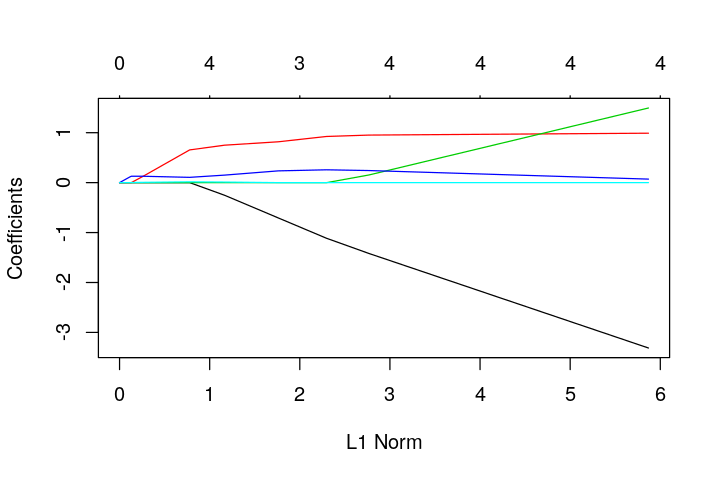

[1] 0.007048824

[1] 0.8105228

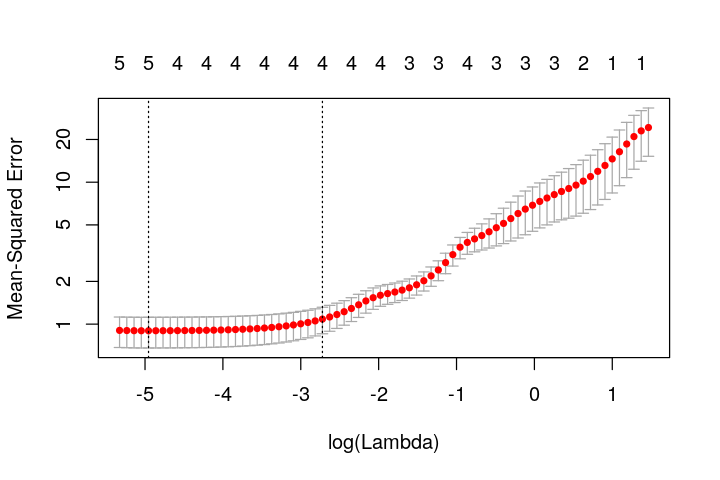

In [3]:
options(repr.plot.width=6, repr.plot.height=4)
#e 
require(glmnet)

train <- sample(c(rep(T,75),rep(F,25)), 100)
test <- !train

X = t(sapply(x, function(i) i**c(1:10)))

grid = 10^seq(10,-2,length=100)

lasso.mod=glmnet(X[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)

cv.out=cv.glmnet(X[train,],y[train],alpha=1)
plot(cv.out, log='y')
(bestlam=cv.out$lambda.min)
lasso.pred=predict(lasso.mod,s=bestlam,newx=X[test,])
mean((lasso.pred-y[test])^2)

,Cp,bic,adjr2
(Intercept),2.148954,2.148954,2.148954
X7,-3.998991,-3.998991,-3.998991


,Cp,bic,adjr2
(Intercept),2.148954,2.148954,2.148954
X7,-3.998991,-3.998991,-3.998991


,Cp,bic,adjr2
(Intercept),2.148954,2.148954,2.148954
X7,-3.998991,-3.998991,-3.998991


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

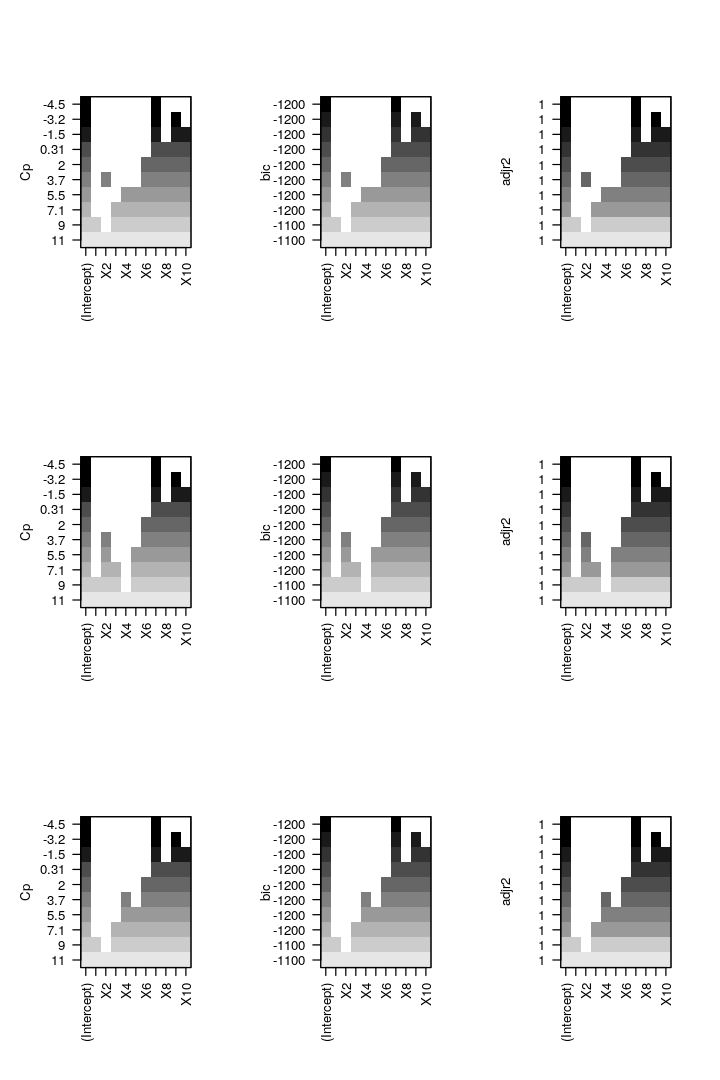

[1] 13.20586

[1] 2.342829

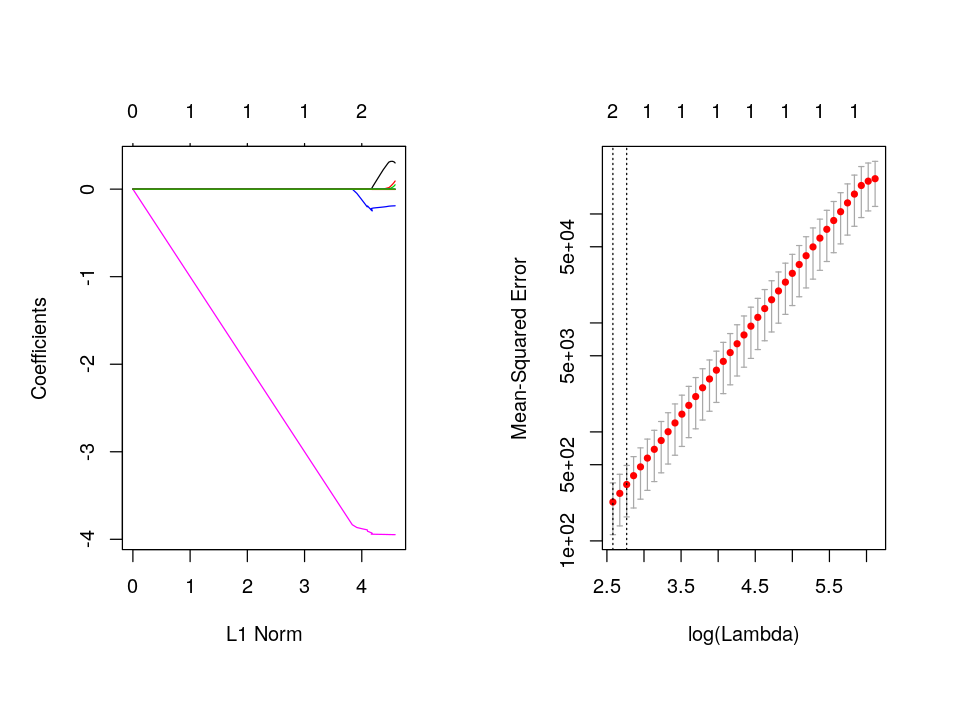

In [4]:
# f
y2 = 2 - 4*x^7 + rnorm(100)
df2=data.frame(y2,X)
regsub.all2 = regsubsets(y2~.,df2,nvmax=10)
regsub.fwd2 = regsubsets(y2~.,df2,nvmax=10, method="forward")
regsub.bwd2 = regsubsets(y2~.,df2,nvmax=10, method="backward")

options(repr.plot.width=6, repr.plot.height=9)
par(mfrow=c(3,3))
sapply(criteria,mysummary,regsub.all2)
sapply(criteria,mysummary,regsub.fwd2)
sapply(criteria,mysummary,regsub.bwd2)

options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(1,2))

lasso.mod2=glmnet(X[train,],y2[train],alpha=1,lambda=grid)
plot(lasso.mod2)

cv.out2=cv.glmnet(X[train,],y2[train],alpha=1)
plot(cv.out2, log='y')
(bestlam=cv.out2$lambda.min)
lasso.pred=predict(lasso.mod2,s=bestlam,newx=X[test,])
mean((lasso.pred-y2[test])^2)

### 9. In this exercise, we will predict the number of applications received using the other variables in the `College` data set.

#### (a) Split the data set into a training set and a test set.

#### (b) Fit a linear model using least squares on the training set, and report the test error obtained.

#### (c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

#### (d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

#### (e) Fit a PCR model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

#### (f) Fit a PLS model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

#### (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

In [5]:
require(ISLR)
str(College)
sum(is.na(College))

Loading required package: ISLR


'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

[1] 0

In [6]:
ntrain <- round(0.75*nrow(College))
train <- sample(c(rep(T,ntrain),rep(F,nrow(College)-ntrain)),nrow(College))
test <- !train

lm.model <- lm(Apps~., College, subset=train)
lm.pred <- predict(lm.model, newdata = College[test,], type='response')
(lm.mse <- mean((lm.pred-College$Apps[test])^2))

[1] 1755491

[1] 31.0676

[1] 3.436165

[1] 1957588

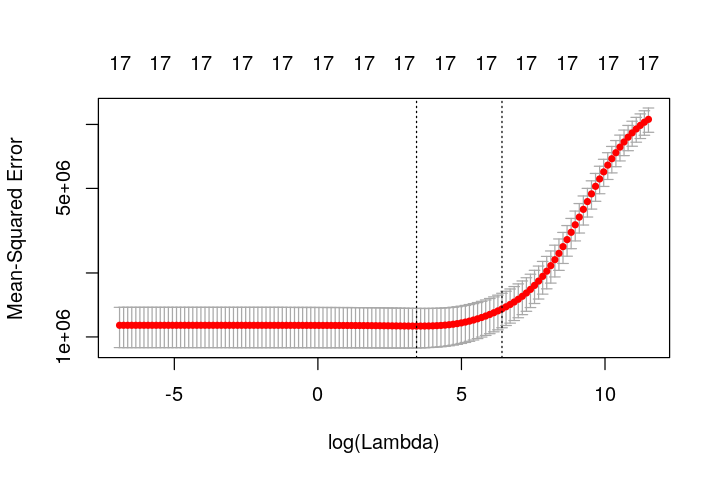

In [7]:
options(repr.plot.width=6, repr.plot.height=4)

require(glmnet)
y <- College$Apps
X <- model.matrix(Apps~.,College)[,-1]

lambda.grid <- 10^seq(5,-3,length=131)

cv.ridge <- cv.glmnet(X[train,],y[train],alpha=0, lambda=lambda.grid)
plot(cv.ridge, log='y')
bestlam <- cv.ridge$lambda.min
bestlam
log(bestlam)

ridge.mod=glmnet(X[train,],y[train],alpha=0,lambda=bestlam, thresh=1e-12)

ridge.pred <- predict(ridge.mod,newx=X[test,])
(ridge.mse<-mean((ridge.pred-y[test])^2))

[1] 1856214

18 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -1.060167e+03
PrivateYes  -5.420136e+02
Accept       1.248896e+00
Enroll       .           
Top10perc    3.219018e+01
Top25perc   -2.961558e+00
F.Undergrad  2.110303e-02
P.Undergrad  3.197498e-02
Outstate    -5.012886e-02
Room.Board   1.358433e-01
Books        1.258123e-03
Personal     2.085685e-02
PhD         -6.303579e+00
Terminal    -4.765976e+00
S.F.Ratio    2.063015e+01
perc.alumni -9.208271e+00
Expend       1.191689e-01
Grad.Rate    9.419790e+00

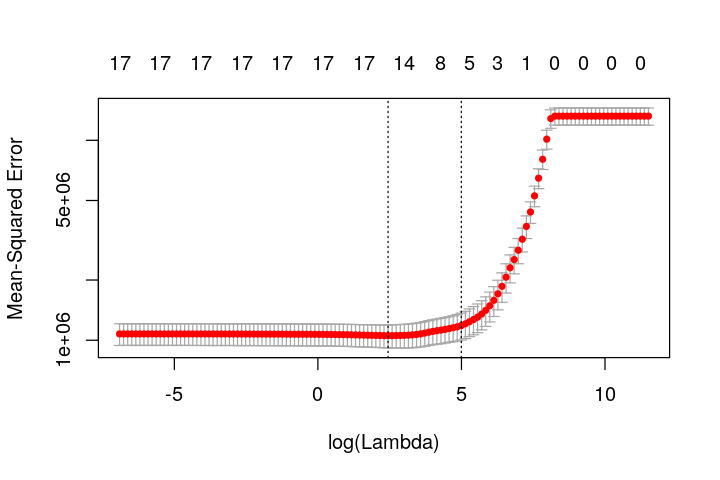

In [8]:
options(repr.plot.width=6, repr.plot.height=4)

cv.lasso <- cv.glmnet(X[train,], y[train], alpha=1, lambda=lambda.grid)
plot(cv.lasso, log='y')
bestlam <- cv.lasso$lambda.min
lasso.mod <- glmnet(X[train,], y[train], alpha=1, lambda=lambda.grid)
lasso.pred <- predict(lasso.mod, newx = X[test,], s=bestlam)
(lasso.mse<-mean((lasso.pred-y[test])^2))

lasso.coef=predict(lasso.mod,type="coefficients", s=bestlam)
lasso.coef

Loading required package: pls

Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



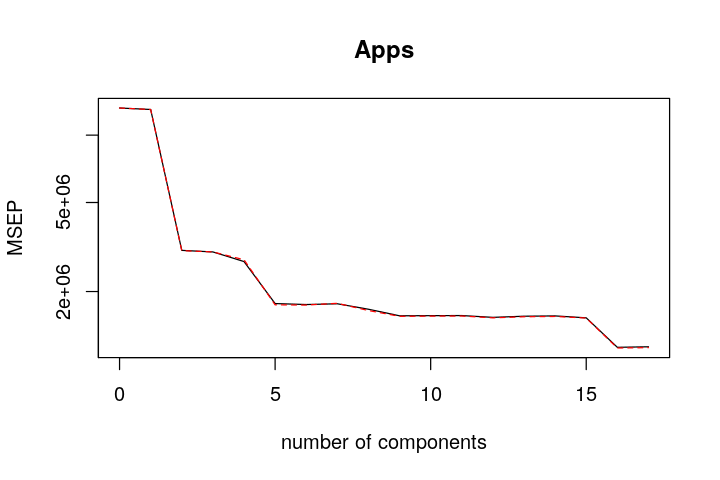

In [9]:
options(repr.plot.width=6, repr.plot.height=4)
require(pls)
pcr.fit=pcr(Apps~., data=College, subset=train, scale=TRUE, validation="CV")
validationplot(pcr.fit,val.type="MSEP", log='y')

In [10]:
(opt = which.min(RMSEP(pcr.fit)$val['CV',,]))
cat('MSE:', pcr.mse<-RMSEP(pcr.fit)$val['CV',,opt]^2)

16 comps 
      17

MSE: 1126364

9 comps 
     10

MSE: 1082222

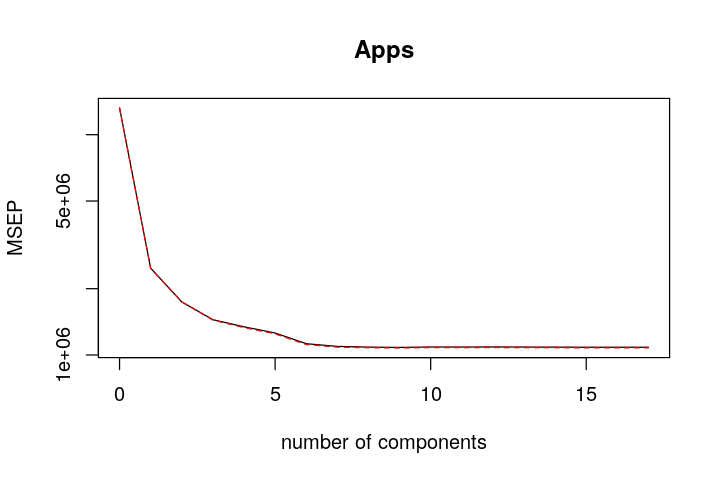

In [11]:
options(repr.plot.width=6, repr.plot.height=4)
pls.fit=plsr(Apps~., data=College, subset=train, scale=TRUE, validation="CV")
validationplot(pls.fit,val.type="MSEP", log='y')
(opt = which.min(RMSEP(pls.fit)$val['CV',,]))
cat('MSE:', pls.mse<-RMSEP(pls.fit)$val['CV',,opt]^2)

In [12]:
cbind(lm.mse, ridge.mse, lasso.mse, pcr.mse, pls.mse)

lm.mse,ridge.mse,lasso.mse,pcr.mse,pls.mse
1755491,1957588,1856214,1126364,1082222


### 10. We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

#### (a) Generate a data set with $p = 20$ features, $n = 1,000$ observations, and an associated quantitative response vector generated according to the model
$$
Y = X\beta + \varepsilon,
$$
#### where $\beta$ has some elements that are exactly equal to zero.

In [13]:
set.seed(987432)
X = matrix(rnorm(20000), ncol=20)
(beta = sample(0:3, 20, replace=T))
y = X%*%beta+rnorm(1000)

[1] 0 3 1 2 0 1 0 3 2 3 2 3 1 0 1 0 0 3 2 0

#### (b) Split your data set into a training set containing 100 observations and a test set containing 900 observations.

In [14]:
train <- sample(c(rep(T,100),rep(F,900)),1000)
test <-!train

#### (c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

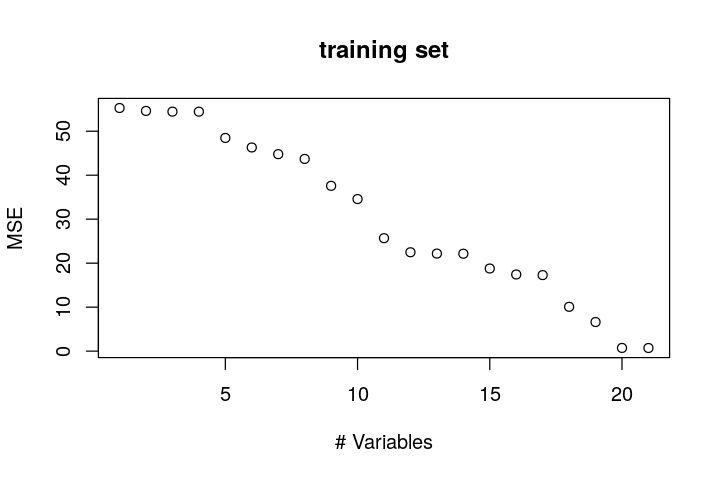

In [15]:
options(repr.plot.width=6, repr.plot.height=4)
require(leaps)
df = data.frame(y,X)
best.sub <- regsubsets(y~.,df[train,],nvmax=20)
plot(best.sub$rss/best.sub$nn, ylab = 'MSE', xlab='# Variables', main = 'training set')

#### (d) Plot the test set MSE associated with the best model of each size.

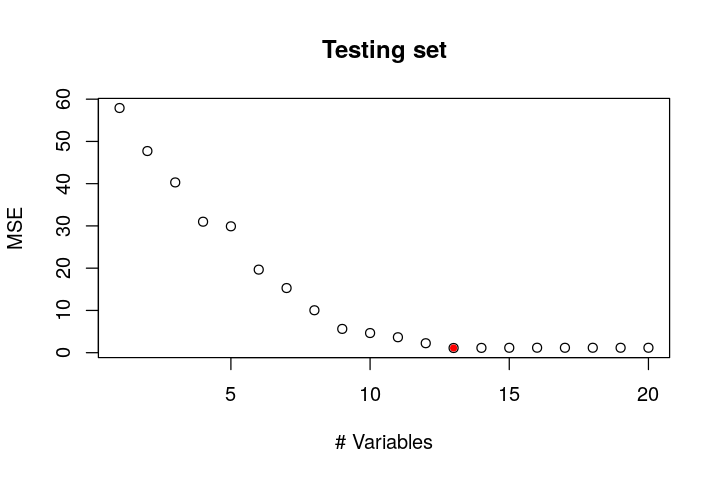

In [16]:
options(repr.plot.width=6, repr.plot.height=4)
test.mat = model.matrix(y~.,df[test,])

val.errors = sapply(1:20, function(i){
  coefi = coef(best.sub, id=i)
  pred = test.mat[,names(coefi)]%*%coefi
  return(mean((y[test]-pred)^2))
})
plot(val.errors, ylab="MSE", xlab='# Variables', main='Testing set')
best.id <-which.min(val.errors) 
points(best.id,min(val.errors),col='red',pch=20)

#### (e) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

In [17]:
round(coef(best.sub, id=best.id),2)
val.errors[best.id]

(Intercept)          X2          X3          X4          X6          X8 
       0.05        2.93        0.86        1.92        0.89        2.93 
         X9         X10         X11         X12         X13         X15 
       2.05        3.01        1.93        2.93        1.02        1.24 
        X18         X19 
       2.81        1.95

[1] 1.107327

#### (f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

In [18]:
which(beta!=0)
as.numeric(gsub('X','',names(coef(best.sub, id=best.id))[-1]))

[1]  2  3  4  6  8  9 10 11 12 13 15 18 19

[1]  2  3  4  6  8  9 10 11 12 13 15 18 19

#### (g) Create a plot displaying $\sqrt{\sum_{j=1}^p(\beta_j-\hat\beta^r_j)^2}$ for a range of values of $r$, where $\hat\beta^r_j$ is the $j$th coefficient estimate for the best model containing $r$ coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

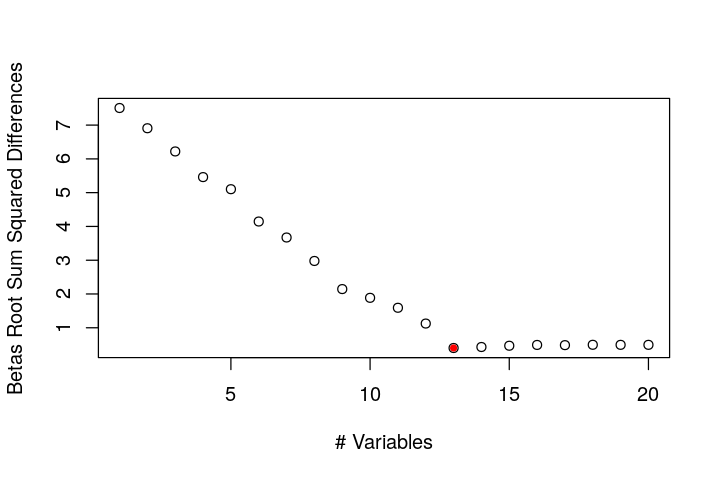

In [19]:
options(repr.plot.width=6, repr.plot.height=4)
# sapply(1:20, function(x) coef(best.sub, id=x), simplify='array')

newbeta = c(0, beta)
names(newbeta)<-names(coef(best.sub, id=20))
rsqdbetas <- rep(0,20)
       
for (r in 1:20){
    coefi <- coef(best.sub, id=r)
    coefnam <- names(coefi)
    dbetas <- newbeta
    dbetas[coefnam] <- newbeta[coefnam]-coefi[coefnam]
    rsqdbetas[r]<-sqrt(sum(dbetas^2))
}

plot(rsqdbetas, ylab="Betas Root Sum Squared Differences", xlab='# Variables')
best.id <-which.min(rsqdbetas) 
points(best.id,min(rsqdbetas),col='red',pch=20)

### 11. We will now try to predict per capita crime rate in the `Boston` data set.

#### (a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

In [20]:
require(MASS)
sum(is.na(Boston))

Loading required package: MASS


[1] 0

folds
 1  2  3  4  5  6  7  8  9 10 
51 51 51 51 51 51 50 50 50 50 

1,2,3,4,5,6,7,8,9,10,11,12,13
28.30316,19.81374,15.30100,16.53383,14.25111,14.00717,13.39285,14.81872,15.66967,15.43904,14.01912,14.06496,14.11130
29.59937,22.99619,19.63016,19.67299,19.18890,18.34203,17.82876,19.20272,20.89046,18.98354,15.73128,15.87568,15.98517
28.45138,32.06451,26.71972,29.51102,25.32933,28.04762,28.80557,27.35082,26.66060,25.73368,24.01903,24.18723,24.16715
48.79944,40.26422,40.91900,38.72523,37.99032,37.59699,36.95474,37.86704,40.20231,39.16721,38.59437,39.50318,39.62969
34.32005,26.59319,20.51573,22.86370,17.01154,18.23485,17.73363,17.73403,17.91460,18.73233,18.22355,18.34788,18.37556
46.60658,33.13843,28.07197,28.60800,25.63075,24.41021,25.84828,24.14710,24.43322,23.15030,22.38471,22.62795,22.65979
24.32973,19.92181,15.49379,15.61182,14.09913,13.27518,12.49492,13.78290,13.70504,14.42981,13.34742,13.97169,14.00066
70.66310,53.19198,45.76112,43.68157,41.11122,40.28016,38.75534,39.29605,39.37320,38.06162,36.02541,36.32476,36.50082
35.61290,37.91868,43.93726,45.85323,39.77196,40.89295,39.32824,40.54753,39.69964,37.97765,36.82312,36.79879,36.85126
42.05893,25.06772,22.81623,23.48994,22.43295,21.27312,21.29488,18.96395,19.01013,19.16185,17.12966,17.24716,17.24695


Best average MSE:  23.62977

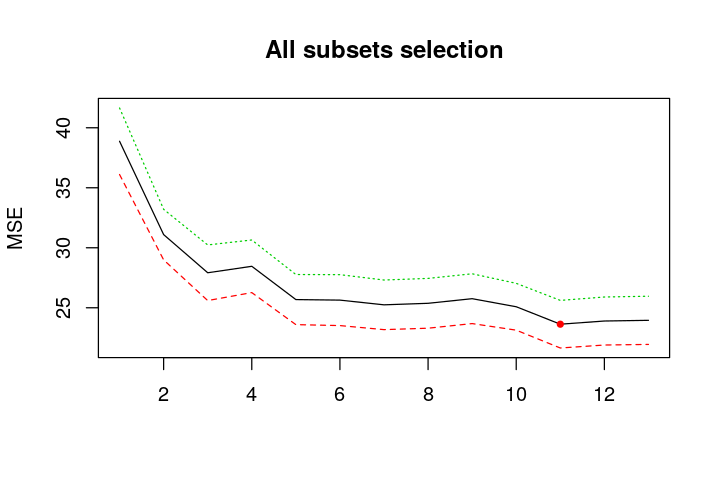

In [21]:
k <- 10
p <-  ncol(Boston)-1
folds <- sample(rep(1:k,length=nrow(Boston)))

table(folds)

MSE.regsubsets = function(object, newdata, id, ...){
  form = as.formula(object$call[[2]])
  dependent = all.vars(form)[1]
  mat = model.matrix(form, newdata)
  coefi = coef(object, id=id)
  xvars = names(coefi)
  pred = mat[,xvars]%*%coefi
  return(mean((newdata[,dependent]-pred)^2))
}

options(repr.plot.width=6, repr.plot.height=4)

### All subsets
cv.errors=matrix(NA,k,p, dimnames=list(NULL, paste(1:p)))
for(j in 1:k){
  best.fit=regsubsets(medv~.,data=Boston[folds!=j,],nvmax=p)
  for(i in 1:p){
    cv.errors[j,i]=MSE.regsubsets(best.fit, Boston[folds==j,],id=i)
  }
}
cv.errors
cv.MSE.subsets=apply(cv.errors,2,mean)
cv.MSE.sd.subsets=apply(cv.errors,2,sd)
matplot = cbind(cv.MSE.subsets,
                cv.MSE.subsets-2*cv.MSE.sd.subsets/k,
                cv.MSE.subsets+2*cv.MSE.sd.subsets/k)
matplot(matplot, main = 'All subsets selection', type='l', ylab='MSE')
best.id <-which.min(cv.MSE.subsets) 
points(best.id,min(cv.MSE.subsets),col='red',pch=20)

cat('Best average MSE: ',min(cv.MSE.subsets))

1,2,3,4,5,6,7,8,9,10,11,12,13
28.30316,19.81374,15.30100,16.53383,14.25111,14.00717,13.39285,14.81872,15.66967,15.43904,14.01912,14.06496,14.11130
29.59937,22.99619,19.63016,19.67299,19.18890,18.34203,17.82876,19.20272,20.89046,18.98354,15.73128,15.87568,15.98517
28.45138,32.06451,26.71972,29.51102,27.09873,28.04762,28.80557,27.35082,26.69435,25.36276,24.01903,24.18723,24.16715
48.79944,40.26422,40.91900,38.72523,37.99032,37.59699,36.95474,37.86704,38.96886,37.35201,38.59437,39.50318,39.62969
34.32005,26.59319,20.51573,22.86370,22.27163,18.23485,17.73363,17.73403,18.12852,17.93553,18.22355,18.34788,18.37556
46.60658,33.13843,28.07197,28.60800,25.63075,24.41021,25.84828,24.14710,24.43322,23.38061,22.38471,22.62795,22.65979
24.32973,19.92181,15.49379,15.61182,14.09913,13.27518,12.49492,13.78290,13.70504,13.21350,13.34742,13.97169,14.00066
70.66310,53.19198,45.76112,43.68157,41.11122,40.28016,38.75534,36.92134,37.42093,36.14769,36.02541,36.32476,36.50082
35.61290,37.91868,43.93726,45.85323,41.32928,40.89295,39.32824,40.54753,38.57349,38.47447,36.82312,36.79879,36.85126
42.05893,25.06772,22.81623,23.48994,22.43295,21.27312,21.29488,18.96395,19.17866,18.84620,17.12966,17.24716,17.24695


Best average MSE:  23.62977

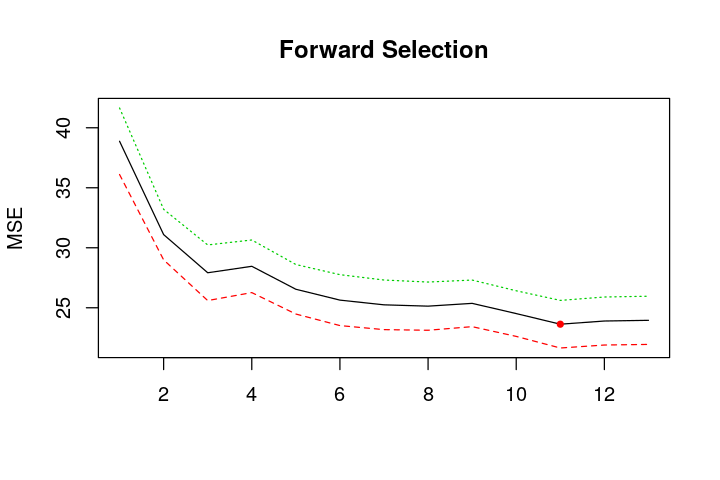

In [22]:
options(repr.plot.width=6, repr.plot.height=4)

### forward selection
cv.errors=matrix(NA,k,p, dimnames=list(NULL, paste(1:p)))
for(j in 1:k){
  best.fit=regsubsets(medv~.,data=Boston[folds!=j,],nvmax=p, method='forward')
  for(i in 1:p){
    cv.errors[j,i]=MSE.regsubsets(best.fit, Boston[folds==j,],id=i)
  }
}
cv.errors
cv.MSE.subsets=apply(cv.errors,2,mean)
cv.MSE.sd.subsets=apply(cv.errors,2,sd)

matplot = cbind(cv.MSE.subsets,
                cv.MSE.subsets-2*cv.MSE.sd.subsets/k,
                cv.MSE.subsets+2*cv.MSE.sd.subsets/k)

matplot(matplot, main = 'Forward Selection', type='l', ylab='MSE')
best.id <-which.min(cv.MSE.subsets) 
points(best.id,min(cv.MSE.subsets),col='red',pch=20)

cat('Best average MSE: ',min(cv.MSE.subsets))

1,2,3,4,5,6,7,8,9,10,11,12,13
28.30316,19.81374,15.30100,16.53383,14.25111,14.00717,13.39285,14.81872,15.66967,15.43904,14.01912,14.06496,14.11130
29.59937,22.99619,19.63016,19.67299,19.18890,18.34203,17.82876,19.20272,20.89046,18.98354,15.73128,15.87568,15.98517
28.45138,32.06451,26.71972,24.50060,25.32933,28.04762,28.80557,27.75204,26.66060,25.73368,24.01903,24.18723,24.16715
48.79944,40.26422,40.91900,38.72523,37.99032,39.24414,37.59238,38.46647,40.20231,39.16721,38.59437,39.50318,39.62969
34.32005,26.59319,20.51573,19.96066,17.01154,18.23485,18.54826,18.43688,18.79268,18.73233,18.22355,18.34788,18.37556
46.60658,33.13843,28.07197,28.60800,25.63075,27.12722,26.75113,26.11289,24.70919,23.15030,22.38471,22.62795,22.65979
24.32973,19.92181,15.49379,15.61182,14.09913,13.24518,14.65434,14.11858,14.52845,14.42981,13.34742,13.97169,14.00066
70.66310,53.19198,45.76112,43.68157,41.11122,40.28016,39.07971,39.29605,39.37320,38.06162,36.02541,36.32476,36.50082
35.61290,37.91868,43.93726,39.91855,39.77196,40.89295,42.15095,40.01423,39.69964,37.97765,36.82312,36.79879,36.85126
42.05893,25.06772,22.81623,23.48994,22.43295,21.27312,20.71958,21.20570,21.04407,19.16185,17.12966,17.24716,17.24695


Best average MSE:  23.62977

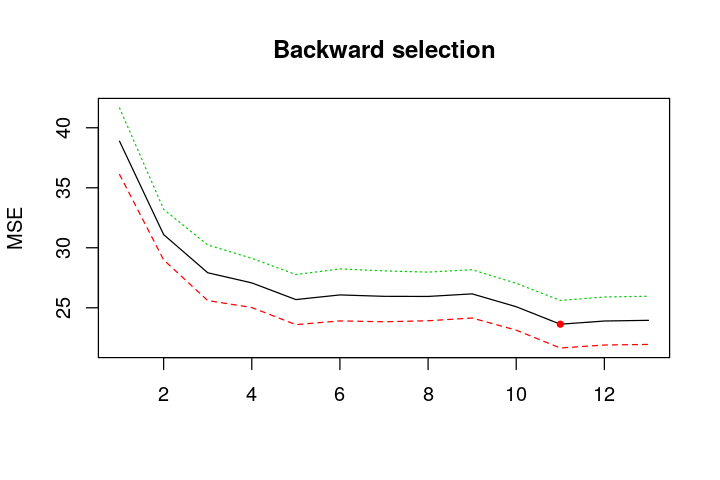

In [23]:
options(repr.plot.width=6, repr.plot.height=4)

### Backward selection
cv.errors=matrix(NA,k,p, dimnames=list(NULL, paste(1:p)))
for(j in 1:k){
  best.fit=regsubsets(medv~.,data=Boston[folds!=j,],nvmax=p, method='backward')
  for(i in 1:p){
    cv.errors[j,i]=MSE.regsubsets(best.fit, Boston[folds==j,],id=i)
  }
}
cv.errors

cv.MSE.subsets=apply(cv.errors,2,mean)
cv.MSE.sd.subsets=apply(cv.errors,2,sd)

matplot = cbind(cv.MSE.subsets,
                cv.MSE.subsets-2*cv.MSE.sd.subsets/k,
                cv.MSE.subsets+2*cv.MSE.sd.subsets/k)

matplot(matplot, main='Backward selection', type='l', ylab='MSE')
best.id <-which.min(cv.MSE.subsets) 
points(best.id,min(cv.MSE.subsets),col='red',pch=20)

cat('Best average MSE: ',min(cv.MSE.subsets))

Best Ridge MSE:  24.9425

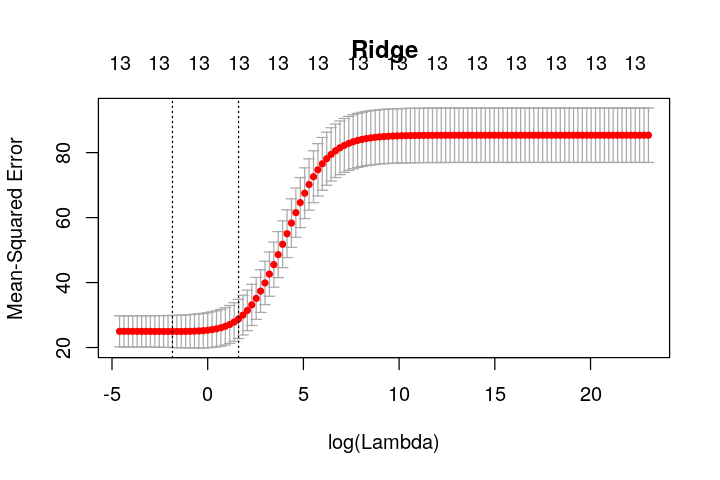

Best Lasso MSE:  24.28919

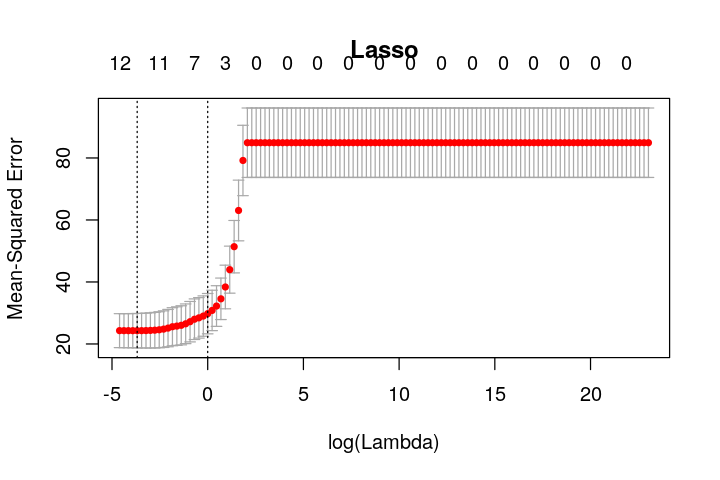

In [24]:
options(repr.plot.width=6, repr.plot.height=4)

### Lasso and Ridge
X <- model.matrix(medv~.,Boston)[,-1]
y <- Boston$medv

l.grid = 10^seq(10,-2,length=121)

require(glmnet)
plot(ridge.cv <- cv.glmnet(X,y,alpha=0, lambda=l.grid), main='Ridge')

cat('Best Ridge MSE: ', min(ridge.cv$cvm))

plot(lasso.cv <- cv.glmnet(X,y,alpha=1, lambda=l.grid), main='Lasso')

cat('Best Lasso MSE: ', min(lasso.cv$cvm))

Best Principal Components Regression MSE:  23.54334

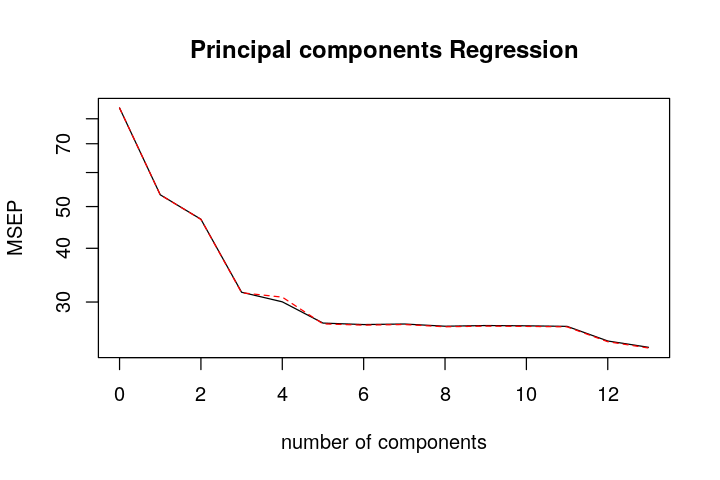

In [25]:
options(repr.plot.width=6, repr.plot.height=4)

require(pls)
pcr.cv=pcr(medv~., data=Boston, scale=TRUE, validation="CV")
validationplot(pcr.cv, val.type="MSEP", log='y', main='Principal components Regression')
cat('Best Principal Components Regression MSE: ', min(MSEP(pcr.cv)$val['CV',,]))

Best Principal Components Regression MSE:  23.53188

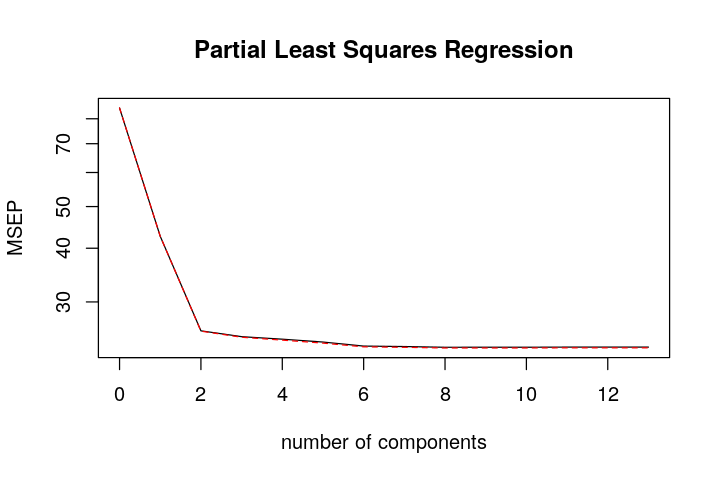

In [26]:
options(repr.plot.width=6, repr.plot.height=4)

pls.cv=plsr(medv~., data=Boston, scale=TRUE, validation="CV")
validationplot(pls.cv,val.type="MSEP", log='y', main='Partial Least Squares Regression')
cat('Best Principal Components Regression MSE: ', min(MSEP(pls.cv)$val['CV',,]))

#### (b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross-validation, or some other reasonable alternative, as opposed to using training error.

The MSE of all models actually look very similar.

#### (c) Does your chosen model involve all of the features in the data set? Why or why not?